In [8]:
# basic
import os
import numpy as np
import pandas as pd
import simpledbf

# plot
import matplotlib.pyplot as plt

# map
import folium

In [2]:
#path = '../../Downloads/19902000_WI_Election_Data_with_2017_Wards/WI_Election_Data_with_2017_Wards.dbf'
path = 'wi_2016_FEST/wi_2016.dbf'

dbf = simpledbf.Dbf5(path)
df = dbf.to_dataframe()
df.head()

OBJECTID_1  OBJECTID           GEOID    MCD_FIPS CNTY_FIPS LSAD     NAME  \
0        3001      3001  55073545000005  5507354500     55073   25  Mosinee   
1        3002      3002  55073545000006  5507354500     55073   25  Mosinee   
2        3003      3003  55073545000007  5507354500     55073   25  Mosinee   
3        3004      3004  55073545250001  5507354525     55073   43  Mosinee   
4        3005      3005  55073545250002  5507354525     55073   43  Mosinee   

  ASM SEN CON    ...     G16PRERTru G16PREDCli G16PRECCas  G16PRElJoh  \
0  86  29   7    ...            219        129          4          10   
1  86  29   7    ...            179        109          2           8   
2  86  29   7    ...             87         53          1           4   
3  86  29   7    ...            283        147          3          15   
4  86  29   7    ...            305        158          2          15   

   G16PREGSte  G16PREOth  G16USSRJoh  G16USSDFei  G16USSLAnd  G16USSOth  
0           3          4         201         148          16          1  
1           5          1         172         118          11          0  
2           3          4          84          57           5          0  
3           3          4         281         153          17          1  
4           3          2         303         164          17          0  

[5 rows x 41 columns]

In [34]:
df['STR_WARDS']

0       0005
1       0006
2       0007
3       0001
4       0002
5       0003
6       0001
7       0001
8       0001
9       0002
10      0001
11      0001
12      0002
13      0003
14      0004
15      0005
16      0006
17      0007
18      0008
19      0009
20      0010
21      0001
22      0001
23      0002
24      0001
25      0002
26      0003
27      0004
28      0005
29      0006
        ... 
6865    0001
6866    0002
6867    0003
6868    0004
6869    0005
6870    0006
6871    0007
6872    0008
6873    0009
6874    0010
6875    0011
6876    0012
6877    0013
6878    0014
6879    0015
6880    0016
6881    0017
6882    0018
6883    0019
6884    0020
6885    0021
6886    0022
6887    0023
6888    0024
6889    0025
6890    0026
6891    0027
6892    0028
6893    0029
6894    0001
Name: STR_WARDS, Length: 6895, dtype: object

In [29]:
df.columns

Index(['OBJECTID_1', 'OBJECTID', 'GEOID', 'MCD_FIPS', 'CNTY_FIPS', 'LSAD',
       'NAME', 'ASM', 'SEN', 'CON', 'COUSUBFP', 'CNTY_NAME', 'STR_WARDS',
       'PERSONS', 'PERSONS18', 'WHITE', 'BLACK', 'HISPANIC', 'ASIAN',
       'AMINDIAN', 'PISLAND', 'OTHER', 'OTHERMLT', 'WHITE18', 'BLACK18',
       'HISPANIC18', 'ASIAN18', 'AMINDIAN18', 'PISLAND18', 'OTHER18',
       'OTHERMLT18', 'G16PRERTru', 'G16PREDCli', 'G16PRECCas', 'G16PRElJoh',
       'G16PREGSte', 'G16PREOth', 'G16USSRJoh', 'G16USSDFei', 'G16USSLAnd',
       'G16USSOth'],
      dtype='object')

In [3]:
electoral_data = df[df.columns[[0, 6, 11, 14, 31, 32]]]

In [22]:
electoral_data.columns = ['id', 'city', 'county', 'elligible', 'republican', 'democrat']
electoral_data.set_index(keys='id', drop=True, inplace=True)
electoral_data.head()

city    county  elligible  republican  democrat
id                                                      
3001  Mosinee  Marathon        454         219       129
3002  Mosinee  Marathon        434         179       109
3003  Mosinee  Marathon        220          87        53
3004  Mosinee  Marathon        585         283       147
3005  Mosinee  Marathon        632         305       158

In [23]:
republican_votes = electoral_data['republican']
democrat_votes = electoral_data['democrat']
republican_results = republican_votes / (republican_votes + democrat_votes)


In [24]:
bins

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

/home/kbacsa/anaconda3/envs/ada/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kbacsa/anaconda3/envs/ada/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/kbacsa/anaconda3/envs/ada/lib/python3.6/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 3000.0)

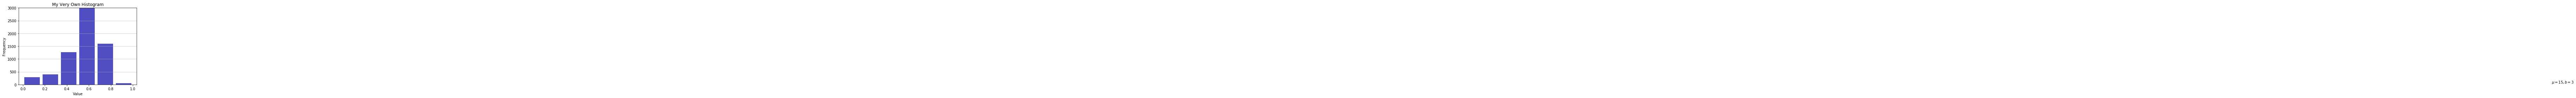

In [25]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=republican_results, bins=6, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [27]:
map_wisconsin = folium.Map(location=[43.0, -89.0], tiles='Mapbox Bright', zoom_start=6)
map_wisconsin.choropleth(geo_data='wisconsin_polling_stations.geojson', data=republican_results, fill_color='BuPu')

In [28]:
map_wisconsin

In [ ]:
#Create map of Europe centered on Switzerland lat=46, long=6
m_eu = folium.Map([46, 6], tiles='Mapbox Bright', zoom_start=4)

#Data to map
map_data= eu_urn['Unemployment (%)']

print(eu_urn.sort_values(by=['Unemployment (%)']))

#Data classification for the choropleth map: Natural breaks (Jenks) Classification
bins = jenks(list(map_data.values), 5) #bins to split the intervals of the colormap into data classes

#Create a step colormap using the sequential colormap YlOrRd and the previously defined bins
colormap = branca.colormap.linear.YlOrRd.to_step(index = bins)
colormap.caption= 'Europe unemployment rates (%)' 

def style_function(feature):
    val=map_data.get(feature['id'][-5:], None) 
    if val is None: #if unemployment rate not given for a country in the topojson
        return {       
        'color' : 'black',
        'fillColor' : 'grey',
        'fillOpacity':0.3,
        'dashArray' : '5, 5',
        'lineOpacity':1,
        'weight':0.5
 }
    else: #else map the unemployment rates to the colormap
        return  {
        'color': 'black',
        'fillColor': colormap(val),
        'fillOpacity': 0.5,
        'lineOpacity':1,
        'weight': 0.5
 }
    
    
folium.TopoJson(open('./topojson/europe.topojson.json'),
                'objects.europe',style_function=style_function).add_to(m_eu)

#add the colormap to render the legend
m_eu.add_child(colormap)

m_eu.save('./Data/maps/EU_unemployment_rates.html')
m_eu